In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap
%matplotlib inline

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
d = xr.open_dataset('/home/soontiensn/data/gpsc-work/OPP/DriftEval/test_cmems/20190906/output/riopsps_od_2019090600_P1D-db4101572D20180808.nc')
dagg = xr.open_dataset('/home/soontiensn/data/gpsc-work/OPP/DriftEval/test_cmems/20190906/output/output_per_drifter/P1D-db4101572D20180808_aggregated.nc')

In [3]:
d.obs_lon

<xarray.DataArray 'obs_lon' (time: 22)>
array([-15.8372, -15.837 , -15.7984, -15.798 , -15.8372, -15.837 , -15.7831,
       -15.8372, -15.8372, -15.837 , -15.7831, -15.8372, -15.8372, -15.8526,
       -15.8372, -15.8372, -15.8913, -15.8913, -15.891 , -15.8913, -15.891 ,
       -15.9067])
Coordinates:
  * time     (time) datetime64[ns] 2019-09-06 ... 2019-09-07
Attributes:
    long_name:  Longitude of observed trajectory
    units:      degrees_east

In [4]:
d.obs_lat

<xarray.DataArray 'obs_lat' (time: 22)>
array([50.374401, 50.374001, 50.4086  , 50.409   , 50.351398, 50.351002,
       50.382   , 50.374401, 50.374401, 50.374001, 50.382   , 50.374401,
       50.374401, 50.4011  , 50.374401, 50.374401, 50.343899, 50.343899,
       50.344002, 50.366798, 50.367001, 50.393501])
Coordinates:
  * time     (time) datetime64[ns] 2019-09-06 ... 2019-09-07
Attributes:
    long_name:  Latitude of observed trajectory
    units:      degrees_north

In [5]:
def plot_drifter(bmap, lat, lon):
    print(lat)
    print(lon)
    x, y = bmap(lon, lat)
    bmap.plot(x,y,'r-')
    bmap.drawcoastlines()

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


[50.37440109 50.37400055 50.40859985 50.4090004  50.35139847 50.35100174
 50.38199997 50.37440109 50.37440109 50.37400055 50.38199997 50.37440109
 50.37440109 50.40110016 50.37440109 50.37440109 50.34389877 50.34389877
 50.34400177 50.3667984  50.36700058 50.39350128]
[-15.83720016 -15.83699989 -15.79839993 -15.79800034 -15.83720016
 -15.83699989 -15.78310013 -15.83720016 -15.83720016 -15.83699989
 -15.78310013 -15.83720016 -15.83720016 -15.8526001  -15.83720016
 -15.83720016 -15.8913002  -15.8913002  -15.89099979 -15.8913002
 -15.89099979 -15.90670013]


Text(0.5, 1.0, 'Drifter after run')

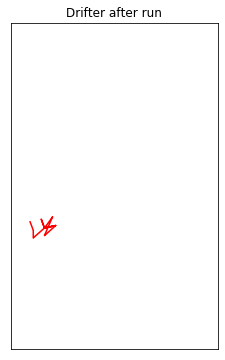

In [6]:
fig,ax = plt.subplots(1,1, figsize=(10,6))
m = Basemap(projection='merc',llcrnrlat=50,urcrnrlat=51,llcrnrlon=-16,urcrnrlon=-15,resolution='l')
plot_drifter(m, d.obs_lat.values, d.obs_lon.values)
ax.set_title('Drifter after run')

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


[50.37440109 50.37400055 50.40859985 50.4090004  50.35139847 50.35100174
 50.38199997 50.37440109 50.37440109 50.37400055 50.38199997 50.37440109
 50.37440109 50.40110016 50.37440109 50.37440109 50.34389877 50.34389877
 50.34400177 50.3667984  50.36700058 50.39350128]
[-15.83720016 -15.83699989 -15.79839993 -15.79800034 -15.83720016
 -15.83699989 -15.78310013 -15.83720016 -15.83720016 -15.83699989
 -15.78310013 -15.83720016 -15.83720016 -15.8526001  -15.83720016
 -15.83720016 -15.8913002  -15.8913002  -15.89099979 -15.8913002
 -15.89099979 -15.90670013]


Text(0.5, 1.0, 'Drifter after agg')

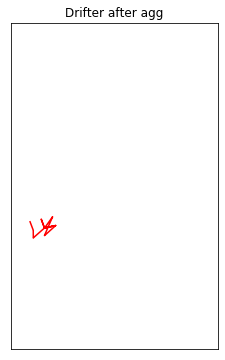

In [7]:
fig,ax = plt.subplots(1,1, figsize=(10,6))
m = Basemap(projection='merc',llcrnrlat=50,urcrnrlat=51,llcrnrlon=-16,urcrnrlon=-15,resolution='l')
plot_drifter(m, np.squeeze(dagg.obs_lat.values), np.squeeze(dagg.obs_lon.values))
ax.set_title('Drifter after agg')

# Drifter file

In [8]:
dorig = xr.open_dataset('/home/soontiensn/data/gpsc-work/db4101572D20180808.nc')
dsel = dorig.sel(TIME=slice('2019-09-06','2019-09-07'))

In [9]:
dsel.LATITUDE

<xarray.DataArray 'LATITUDE' (TIME: 22)>
array([50.374401, 50.374001, 50.4086  , 50.409   , 50.351398, 50.351002,
       50.382   , 50.374401, 50.374401, 50.374001, 50.382   , 50.374401,
       50.374401, 50.4011  , 50.374401, 50.374401, 50.343899, 50.343899,
       50.344002, 50.366798, 50.367001, 50.393501])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2019-09-06 ... 2019-09-07
Attributes:
    long_name:  Latitude of observed trajectory
    units:      degrees_north

In [10]:
dsel.LONGITUDE

<xarray.DataArray 'LONGITUDE' (TIME: 22)>
array([-15.8372, -15.837 , -15.7984, -15.798 , -15.8372, -15.837 , -15.7831,
       -15.8372, -15.8372, -15.837 , -15.7831, -15.8372, -15.8372, -15.8526,
       -15.8372, -15.8372, -15.8913, -15.8913, -15.891 , -15.8913, -15.891 ,
       -15.9067])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2019-09-06 ... 2019-09-07
Attributes:
    long_name:  Longitude of observed trajectory
    units:      degrees_east

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


[50.37440109 50.37400055 50.40859985 50.4090004  50.35139847 50.35100174
 50.38199997 50.37440109 50.37440109 50.37400055 50.38199997 50.37440109
 50.37440109 50.40110016 50.37440109 50.37440109 50.34389877 50.34389877
 50.34400177 50.3667984  50.36700058 50.39350128]
[-15.83720016 -15.83699989 -15.79839993 -15.79800034 -15.83720016
 -15.83699989 -15.78310013 -15.83720016 -15.83720016 -15.83699989
 -15.78310013 -15.83720016 -15.83720016 -15.8526001  -15.83720016
 -15.83720016 -15.8913002  -15.8913002  -15.89099979 -15.8913002
 -15.89099979 -15.90670013]


Text(0.5, 1.0, 'Drifter from data file')

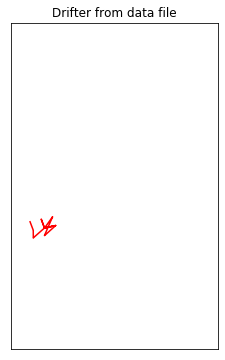

In [11]:
fig,ax = plt.subplots(1,1, figsize=(10,6))
m = Basemap(projection='merc',llcrnrlat=50,urcrnrlat=51,llcrnrlon=-16,urcrnrlon=-15,resolution='l')
plot_drifter(m, np.squeeze(dsel.LATITUDE.values), np.squeeze(dsel.LONGITUDE.values))
ax.set_title('Drifter from data file')

# Original drifter file

In [12]:
dorig = xr.open_dataset('/home/soontiensn/data/gpsc-work/GL_LATEST_TS_DB_4101572_20190906.nc')
dsel = dorig.sel(TIME=slice('2019-09-06','2019-09-07'))

In [13]:
dsel.LATITUDE

<xarray.DataArray 'LATITUDE' (LATITUDE: 21)>
array([50.3744, 50.374 , 50.4086, 50.409 , 50.3514, 50.351 , 50.382 , 50.3744,
       50.3744, 50.374 , 50.382 , 50.3744, 50.3744, 50.4011, 50.3744, 50.3744,
       50.3439, 50.3439, 50.344 , 50.3668, 50.367 ], dtype=float32)
Coordinates:
  * LATITUDE  (LATITUDE) float32 50.3744 50.374 50.4086 ... 50.3668 50.367
Attributes:
    long_name:      Latitude of each location
    standard_name:  latitude
    units:          degree_north
    valid_min:      -90.0
    valid_max:      90.0
    QC_indicator:   1
    QC_procedure:   1
    uncertainty:     
    comment:         
    axis:           Y

In [14]:
dsel.LONGITUDE

<xarray.DataArray 'LONGITUDE' (LONGITUDE: 21)>
array([-15.8372, -15.837 , -15.7984, -15.798 , -15.8372, -15.837 , -15.7831,
       -15.8372, -15.8372, -15.837 , -15.7831, -15.8372, -15.8372, -15.8526,
       -15.8372, -15.8372, -15.8913, -15.8913, -15.891 , -15.8913, -15.891 ],
      dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 -15.8372 -15.837 ... -15.8913 -15.891
Attributes:
    long_name:      Longitude of each location
    standard_name:  longitude
    units:          degree_east
    valid_min:      -180.0
    valid_max:      180.0
    QC_indicator:   1
    QC_procedure:   1
    uncertainty:     
    comment:         
    axis:           X

In [15]:
dsel.POSITION_QC

<xarray.DataArray 'POSITION_QC' (POSITION: 21)>
array([1., 1., 1., 1., 4., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.], dtype=float32)
Dimensions without coordinates: POSITION
Attributes:
    long_name:      quality flag
    conventions:    OceanSITES reference table 2
    valid_min:      0
    valid_max:      9
    flag_values:    [0 1 2 3 4 5 6 7 8 9]
    flag_meanings:  no_qc_performed good_data probably_good_data bad_data_tha...

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


[50.3744 50.374  50.4086 50.409  50.3514 50.351  50.382  50.3744 50.3744
 50.374  50.382  50.3744 50.3744 50.4011 50.3744 50.3744 50.3439 50.3439
 50.344  50.3668 50.367 ]
[-15.8372 -15.837  -15.7984 -15.798  -15.8372 -15.837  -15.7831 -15.8372
 -15.8372 -15.837  -15.7831 -15.8372 -15.8372 -15.8526 -15.8372 -15.8372
 -15.8913 -15.8913 -15.891  -15.8913 -15.891 ]


Text(0.5, 1.0, 'Drifter from original data file')

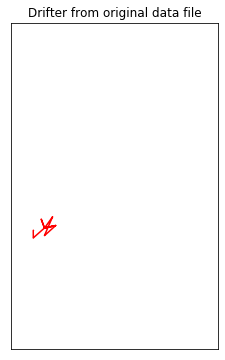

In [16]:
fig,ax = plt.subplots(1,1, figsize=(10,6))
m = Basemap(projection='merc',llcrnrlat=50,urcrnrlat=51,llcrnrlon=-16,urcrnrlon=-15,resolution='l')
plot_drifter(m, np.squeeze(dsel.LATITUDE.values), np.squeeze(dsel.LONGITUDE.values))
ax.set_title('Drifter from original data file')

In [17]:
dsel2 = dsel.POSITION_QC ==1

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


[50.3744 50.374  50.4086 50.409  50.351  50.382  50.3744 50.3744 50.374
 50.382  50.3744 50.3744 50.4011 50.3744 50.3744 50.3439 50.3439 50.344
 50.3668 50.367 ]
[-15.8372 -15.837  -15.7984 -15.798  -15.837  -15.7831 -15.8372 -15.8372
 -15.837  -15.7831 -15.8372 -15.8372 -15.8526 -15.8372 -15.8372 -15.8913
 -15.8913 -15.891  -15.8913 -15.891 ]


Text(0.5, 1.0, 'Drifter from original data file')

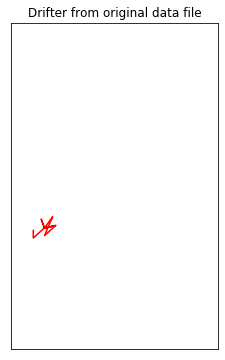

In [18]:
fig,ax = plt.subplots(1,1, figsize=(10,6))
m = Basemap(projection='merc',llcrnrlat=50,urcrnrlat=51,llcrnrlon=-16,urcrnrlon=-15,resolution='l')
plot_drifter(m, np.squeeze(dsel.LATITUDE[dsel2.values].values), np.squeeze(dsel.LONGITUDE[dsel2.values].values))
ax.set_title('Drifter from original data file')

In [19]:
dsel.TIME

<xarray.DataArray 'TIME' (TIME: 21)>
array(['2019-09-06T00:00:00.000000000', '2019-09-06T01:00:00.000000000',
       '2019-09-06T02:00:00.000000000', '2019-09-06T03:00:00.000000000',
       '2019-09-06T04:00:00.000000000', '2019-09-06T05:00:00.000000000',
       '2019-09-06T06:00:00.000000000', '2019-09-06T07:00:00.000000000',
       '2019-09-06T08:00:00.000000000', '2019-09-06T10:00:00.000000000',
       '2019-09-06T11:00:00.000000000', '2019-09-06T13:00:00.000000000',
       '2019-09-06T14:00:00.000000000', '2019-09-06T16:00:00.000000000',
       '2019-09-06T17:00:00.000000000', '2019-09-06T18:00:00.000000000',
       '2019-09-06T19:00:00.000000000', '2019-09-06T20:00:00.000000000',
       '2019-09-06T21:00:00.000000000', '2019-09-06T22:00:00.000000000',
       '2019-09-06T23:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * TIME     (TIME) datetime64[ns] 2019-09-06 ... 2019-09-06T23:00:00
Attributes:
    long_name:      Time
    standard_name:  time
    valid_min:      -90

Times missed:  0900, 1500

In [20]:
dsel.TIME[dsel2.values]

<xarray.DataArray 'TIME' (TIME: 20)>
array(['2019-09-06T00:00:00.000000000', '2019-09-06T01:00:00.000000000',
       '2019-09-06T02:00:00.000000000', '2019-09-06T03:00:00.000000000',
       '2019-09-06T05:00:00.000000000', '2019-09-06T06:00:00.000000000',
       '2019-09-06T07:00:00.000000000', '2019-09-06T08:00:00.000000000',
       '2019-09-06T10:00:00.000000000', '2019-09-06T11:00:00.000000000',
       '2019-09-06T13:00:00.000000000', '2019-09-06T14:00:00.000000000',
       '2019-09-06T16:00:00.000000000', '2019-09-06T17:00:00.000000000',
       '2019-09-06T18:00:00.000000000', '2019-09-06T19:00:00.000000000',
       '2019-09-06T20:00:00.000000000', '2019-09-06T21:00:00.000000000',
       '2019-09-06T22:00:00.000000000', '2019-09-06T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * TIME     (TIME) datetime64[ns] 2019-09-06 ... 2019-09-06T23:00:00
Attributes:
    long_name:      Time
    standard_name:  time
    valid_min:      -90000.0
    valid_max:      90000.0


Time 1200 was a bad position